In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

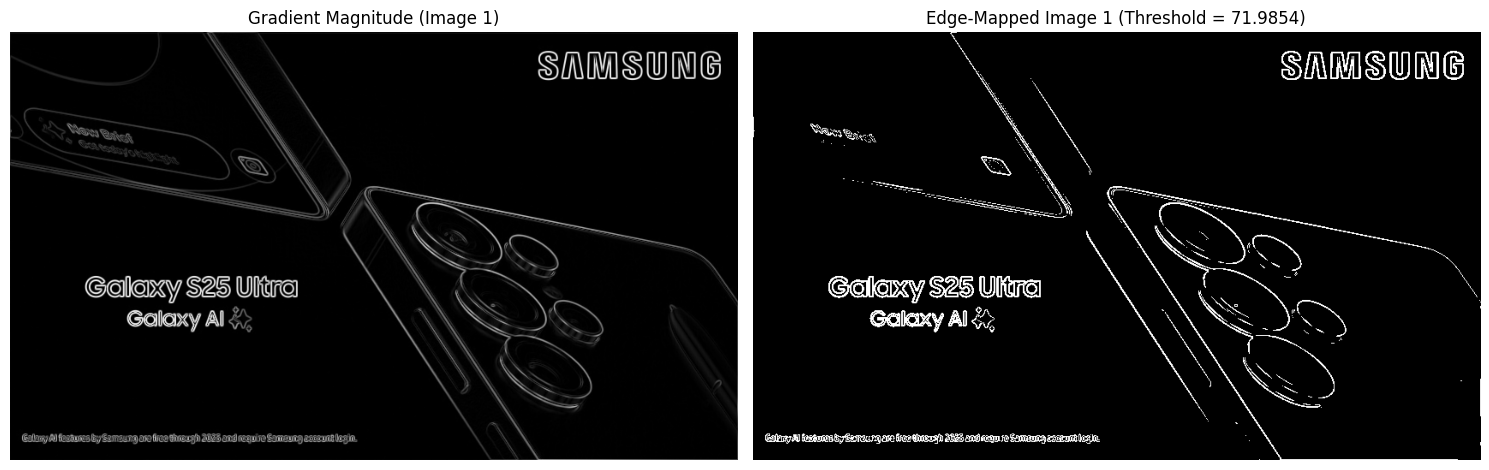

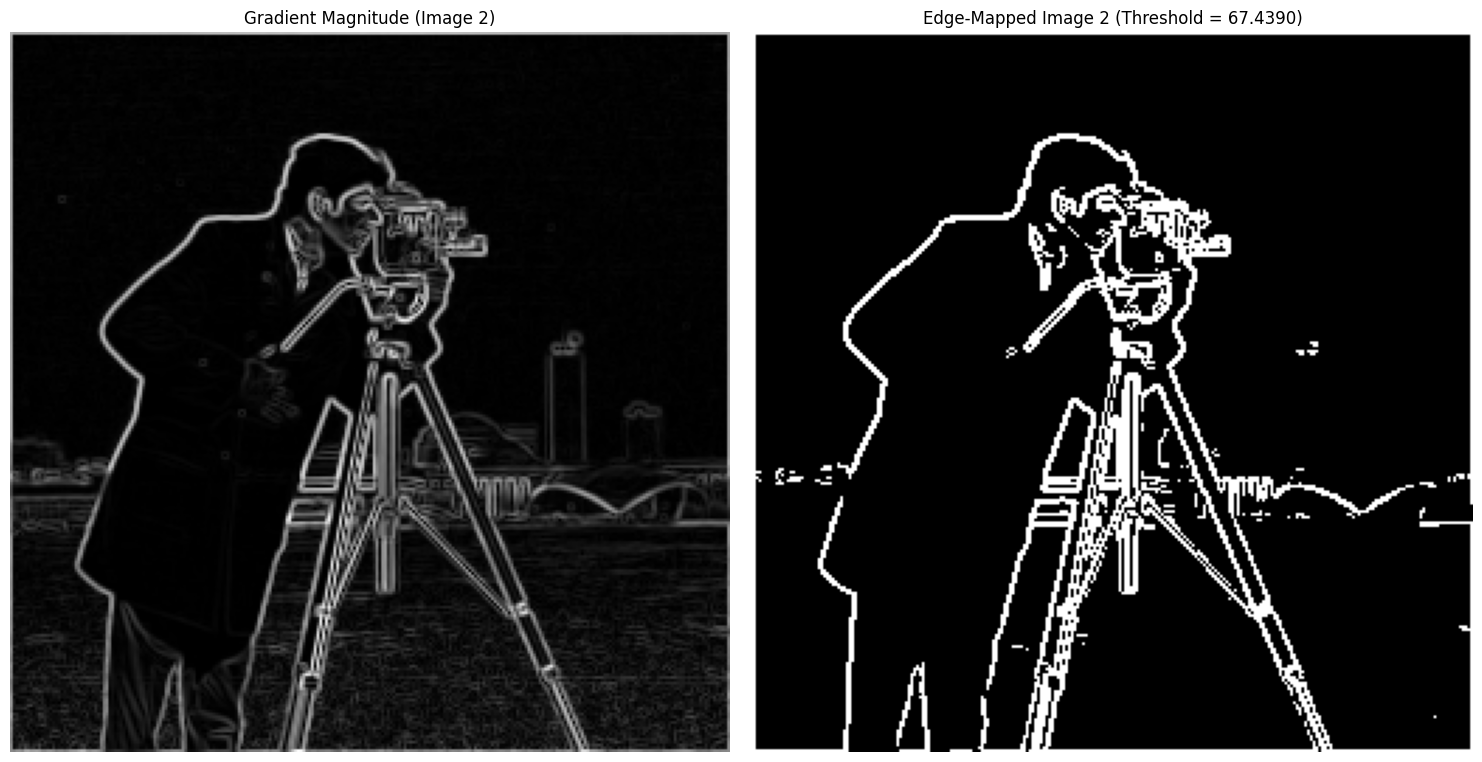

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [17]:
def alg_threshold(gradient):
  """finding threshold value for detection"""
  tau = np.mean(gradient)
  prev = None
  count = 0
  epsilon = 1e-2
  while True:
    count +=1

    #lower consists gMag < tau
    #upper consist gMag >= tau
    lower = gradient[gradient < tau]
    upper = gradient[gradient >= tau]

    #compute mag of mL and mH
    mL = np.mean(lower)
    mH = np.mean(upper)

    newTau = (mL + mH) / 2
    if abs(newTau - tau) < epsilon:
      break
    prev = tau
    tau = newTau

  edge_map = np.where(gradient >= tau, 255, 0).astype(np.uint8)
  return tau, edge_map


gradient_img1 = cv2.imread("gradient_image1.png", cv2.IMREAD_GRAYSCALE)
gradient_img2 = cv2.imread("gradient_image2.png", cv2.IMREAD_GRAYSCALE)


tau1, edge_map1 = alg_threshold(gradient_img1)
tau2, edge_map2 = alg_threshold(gradient_img2)


fig1 = plt.figure(figsize=(15, 7.5))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

ax1.imshow(gradient_img1, cmap='gray')
ax1.set_title('Gradient Magnitude (Image 1)')
ax1.axis('off')

ax2.imshow(edge_map1, cmap='gray')
ax2.set_title(f'Edge-Mapped Image 1 (Threshold = {tau1:.4f})')
ax2.axis('off')

plt.tight_layout()
plt.show()

fig2 = plt.figure(figsize=(15, 7.5))
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)

ax1.imshow(gradient_img2, cmap='gray')
ax1.set_title('Gradient Magnitude (Image 2)')
ax1.axis('off')

ax2.imshow(edge_map2, cmap='gray')
ax2.set_title(f'Edge-Mapped Image 2 (Threshold = {tau2:.4f})')
ax2.axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite("edge_map1.png", edge_map1)
cv2.imwrite("edge_map2.png", edge_map2)

plt.savefig("threshold_alg.png", dpi=300, bbox_inches="tight")

from google.colab import files
files.download("threshold_alg.png")
